# Import Libraries


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("hotel_booking.csv")

In [28]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [29]:
df.shape

(119390, 36)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [31]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [32]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


## create function for object column to see unique values

In [33]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())


hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [34]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [35]:
df.drop(["company","agent"], axis=1, inplace=True)

In [36]:
df.dropna(inplace=True)

In [37]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [39]:
df = df[df["adr"]<5000]

In [40]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## data analysis and vizualization

In [41]:
cancelled_perc = df["is_canceled"].value_counts(normalize=True)
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

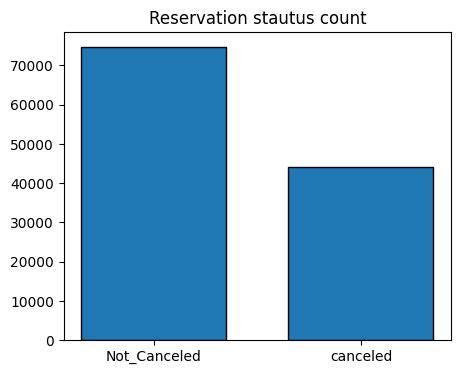

In [42]:
plt.figure(figsize= (5,4))
plt.title("Reservation stautus count")
plt.bar(["Not_Canceled","canceled"],df["is_canceled"].value_counts(), edgecolor = "k",width = 0.7)
plt.show()

## which hotel cancellation is high



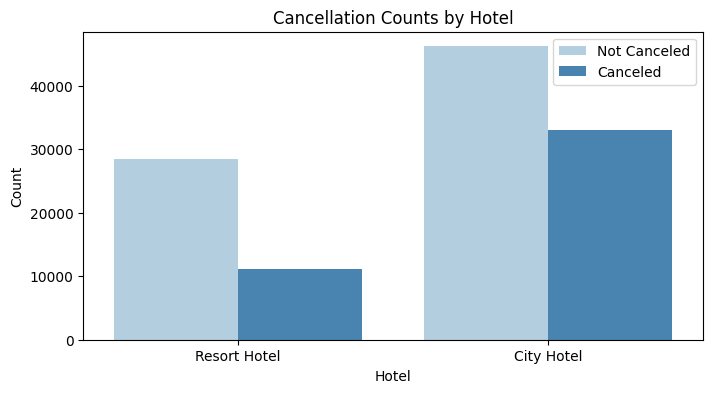

In [43]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x="hotel", hue="is_canceled", data=df, palette="Blues")

# Get legend labels and set the legend
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Canceled", "Canceled"], bbox_to_anchor=(1, 1))

# Add labels and title to the plot
plt.xlabel("Hotel")
plt.ylabel("Count")
plt.title("Cancellation Counts by Hotel")

# Show the plot
plt.show()

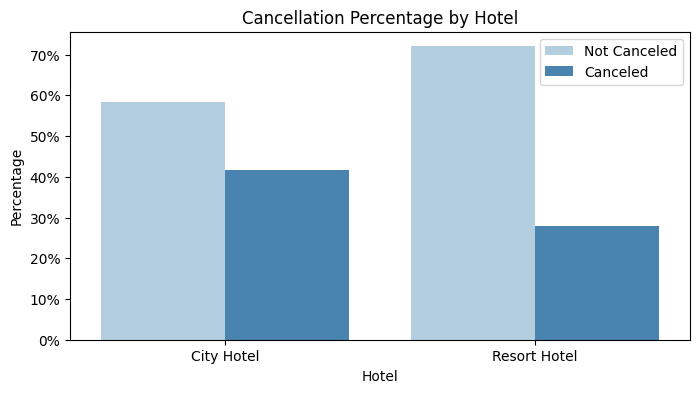

In [44]:
# Calculate the cancellation percentages for each category in the "hotel" column
cancellation_percentages = df.groupby(['hotel', 'is_canceled']).size() / df.groupby('hotel').size()
cancellation_percentages = cancellation_percentages.reset_index(name='percentage')

# Create the count plot
plt.figure(figsize=(8, 4))
ax1 = sns.barplot(x="hotel", y="percentage", hue="is_canceled", data=cancellation_percentages, palette="Blues")

# Format y-axis as percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

# Get legend labels and set the legend
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Canceled", "Canceled"], bbox_to_anchor=(1, 1))

# Add labels and title to the plot
plt.xlabel("Hotel")
plt.ylabel("Percentage")
plt.title("Cancellation Percentage by Hotel")

# Show the plot
plt.show()

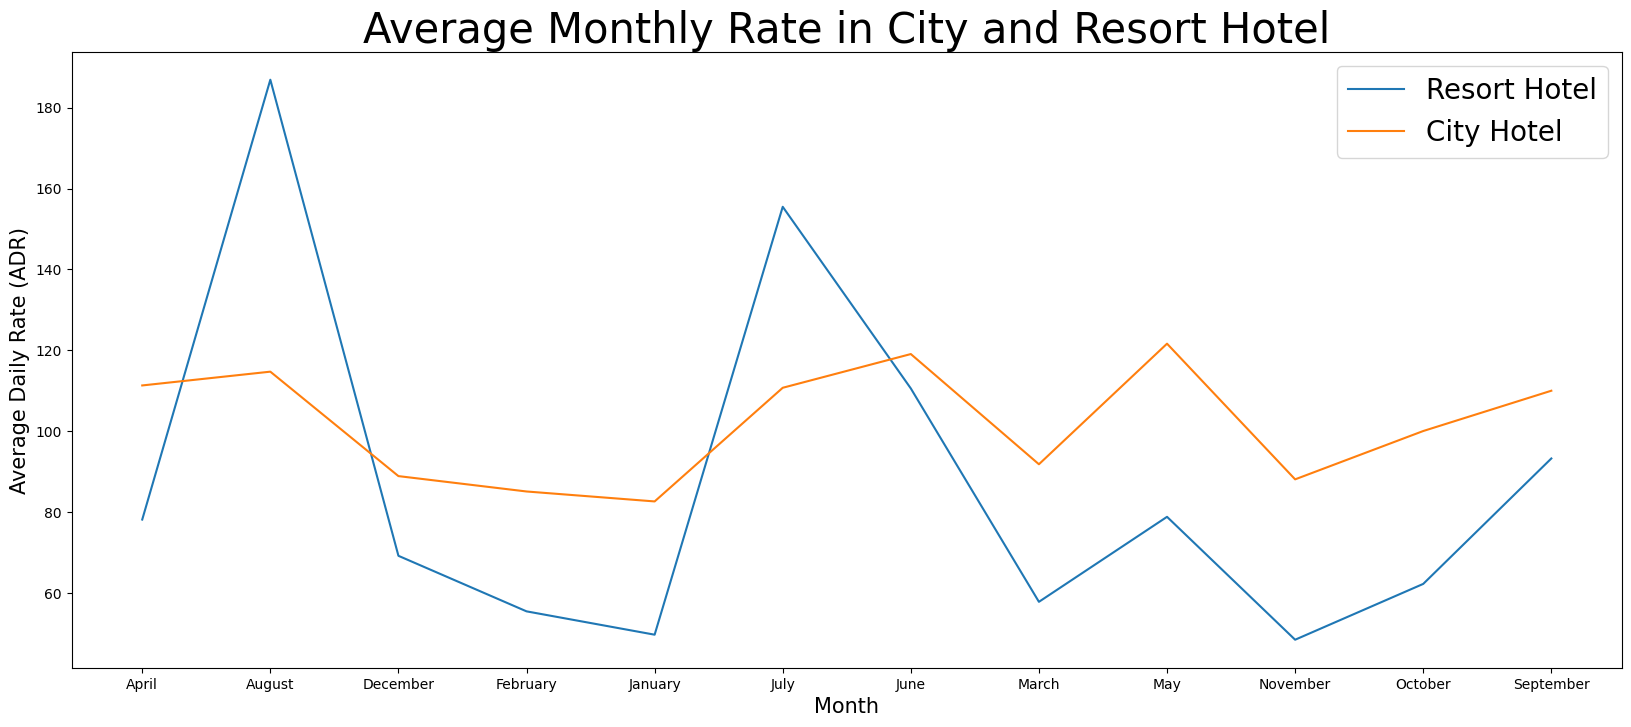

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with columns 'hotel' and 'adr'

# Filter the DataFrame for resort hotels and calculate the average daily rate
resort_hotel = df[df['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['adr'].mean()

# Filter the DataFrame for city hotels and calculate the average daily rate
city_hotel = df[df['hotel'] == 'City Hotel'].groupby('arrival_date_month')['adr'].mean()

# Create the plot
plt.figure(figsize=(20, 8))
plt.title("Average Monthly Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel, label="Resort Hotel")
plt.plot(city_hotel.index, city_hotel, label="City Hotel")
plt.legend(fontsize=20)

# Add labels to the plot
plt.xlabel("Month", fontsize=15)
plt.ylabel("Average Daily Rate (ADR)", fontsize=15)

# Show the plot
plt.show()


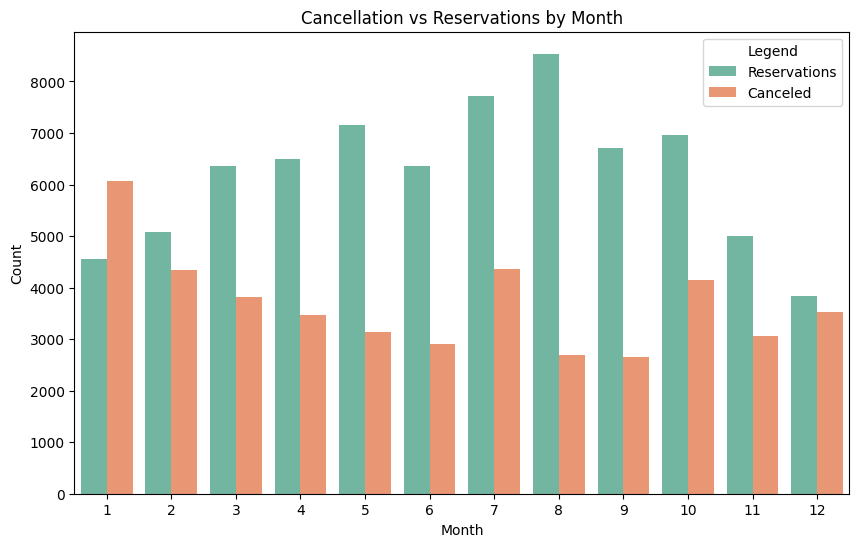

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with columns 'is_canceled' and 'reservation_status_date'

# Convert 'reservation_status_date' column to datetime type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month from 'reservation_status_date' column
df['reservation_month'] = df['reservation_status_date'].dt.month

# Create count plot for cancellations
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_month', hue='is_canceled', data=df, palette='Set2')
plt.title('Cancellation vs Reservations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Legend', labels=['Reservations', 'Canceled'])

# Show the plot
plt.show()


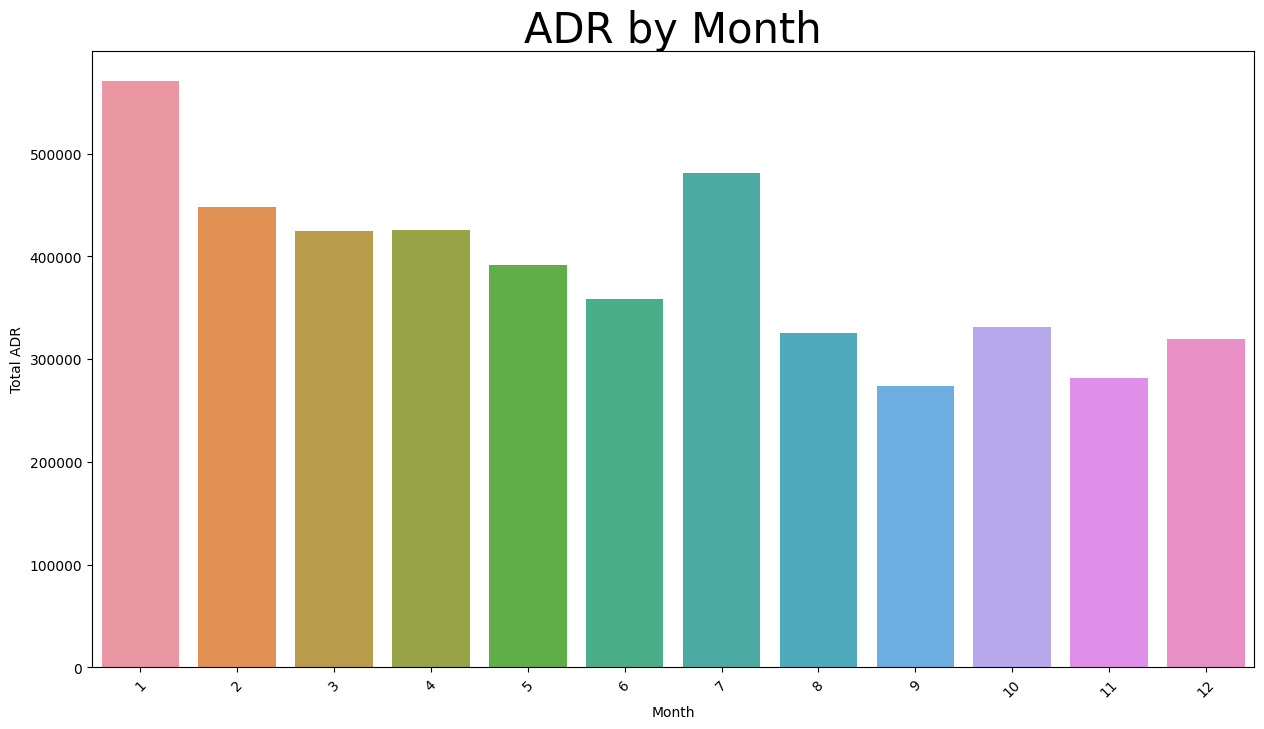

In [47]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.title("ADR by Month", fontsize=30)

# Filter the DataFrame for canceled bookings (is_canceled == 1)
canceled_bookings = df[df["is_canceled"] == 1]

# Group the data by "reservation_month" and calculate the sum of ADR for each month
monthly_adr = canceled_bookings.groupby("reservation_month")["adr"].sum().reset_index()

# Create the bar plot
sns.barplot(x="reservation_month", y="adr", data=monthly_adr)

# Add labels and title to the plot
plt.xlabel("Month")
plt.ylabel("Total ADR")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

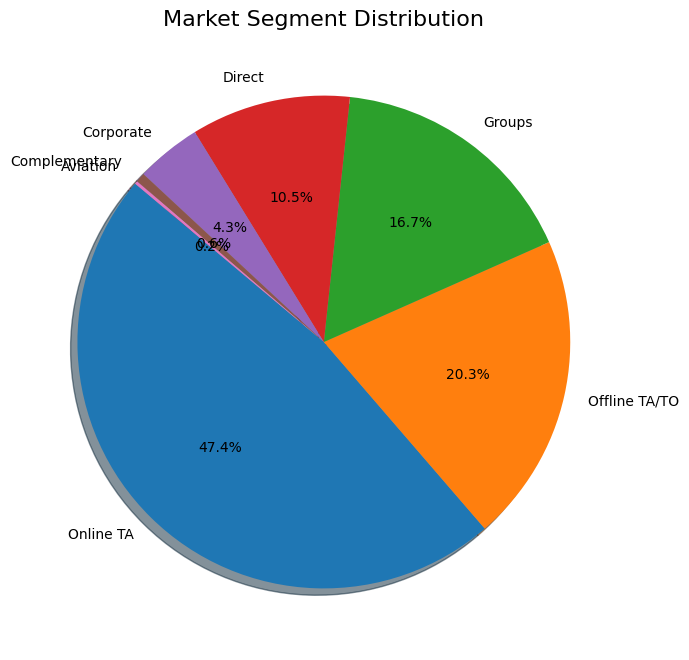

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with the 'market_segment' column

# Get the value counts of each market segment
market_segment_counts = df["market_segment"].value_counts()

# Calculate the percentages for each market segment
market_segment_percentages = market_segment_counts / len(df) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_segment_percentages, labels=market_segment_percentages.index, autopct='%1.1f%%', startangle=140, shadow=True)

# Add a title to the pie chart
plt.title("Market Segment Distribution", fontsize=16)

# Show the pie chart
plt.show()


### lets check on country bases

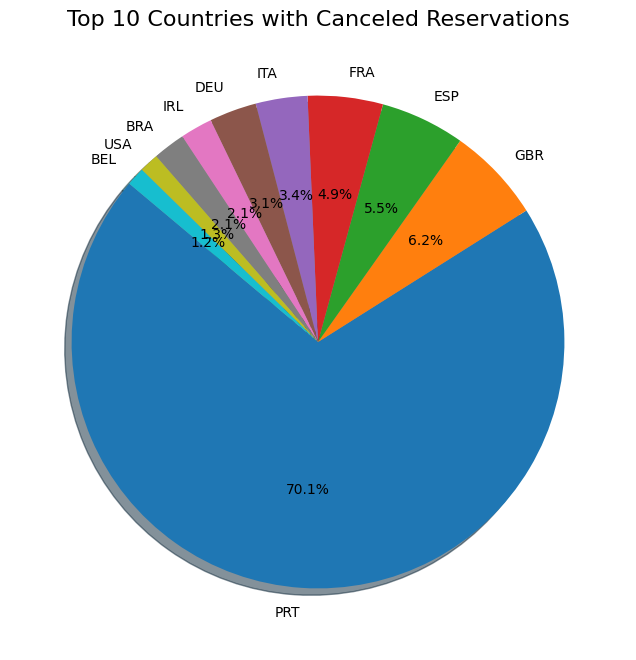

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with columns 'is_canceled' and 'country'

# Filter the DataFrame for canceled bookings (is_canceled == 1)
canceled_bookings = df[df["is_canceled"] == 1]

# Get the top 10 countries with the most canceled reservations
top_10_countries = canceled_bookings["country"].value_counts().nlargest(10)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140, shadow=True)

# Add a title to the pie chart
plt.title("Top 10 Countries with Canceled Reservations", fontsize=16)

# Show the pie chart
plt.show()


In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='is_canceled', data=country_PRT, ci=None)
plt.title('Cancellation Rate by Market Segment (PRT Country)')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)  # Limit y-axis to (0, 1) as it represents a percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


NameError: name 'country_PRT' is not defined

<Figure size 1000x600 with 0 Axes>

## lets check the clients 

In [ ]:
df["market_segment"].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

# lets check why cancelation is so high


### understanding the reasons behind high cancellation rates is crucial for improving business strategies and customer satisfaction. To gain more insights, we can create various plots and graphs to explore the data further. Here are some steps and visualizations we can use to understand the high cancellation rates

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with the necessary columns

# Calculate overall cancellation rate
overall_cancellation_rate = df["is_canceled"].mean() * 100

# Print the overall cancellation rate
print(f"Overall Cancellation Rate: {overall_cancellation_rate:.2f}%")


Overall Cancellation Rate: 37.13%


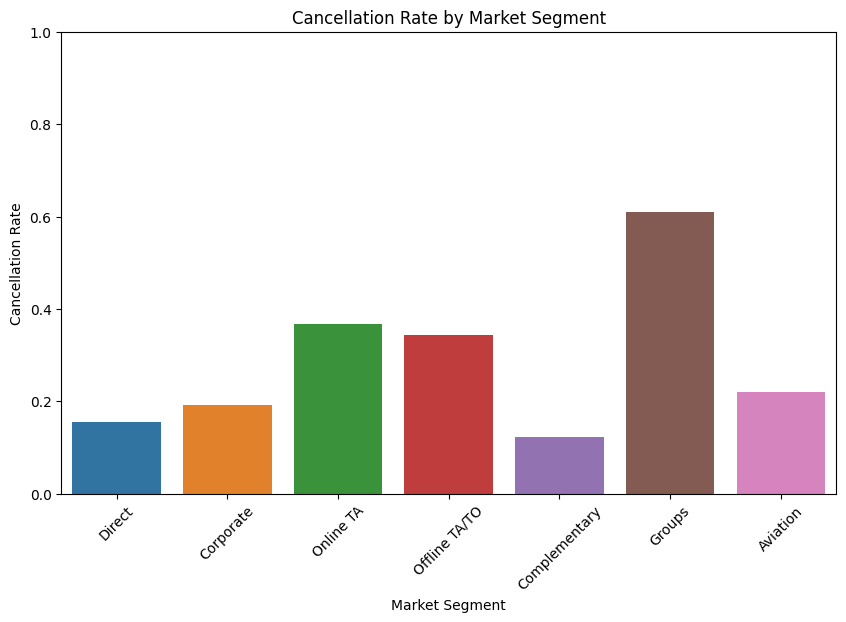

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='is_canceled', data=df, ci=None)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)  # Limit y-axis to (0, 1) as it represents a percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



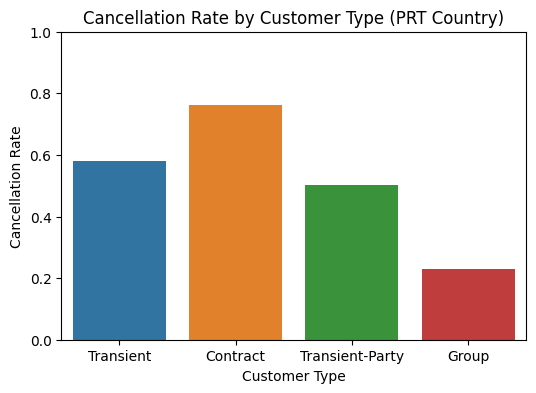

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='customer_type', y='is_canceled', data=country_PRT, ci=None)
plt.title('Cancellation Rate by Customer Type (PRT Country)')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)  # Limit y-axis to (0, 1) as it represents a percentage
plt.show()


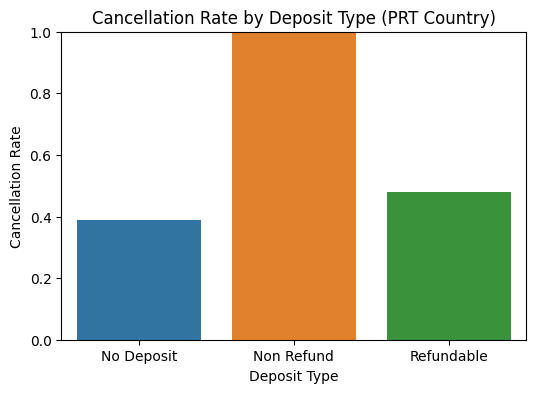

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='deposit_type', y='is_canceled', data=country_PRT, ci=None)
plt.title('Cancellation Rate by Deposit Type (PRT Country)')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)  # Limit y-axis to (0, 1) as it represents a percentage
plt.show()


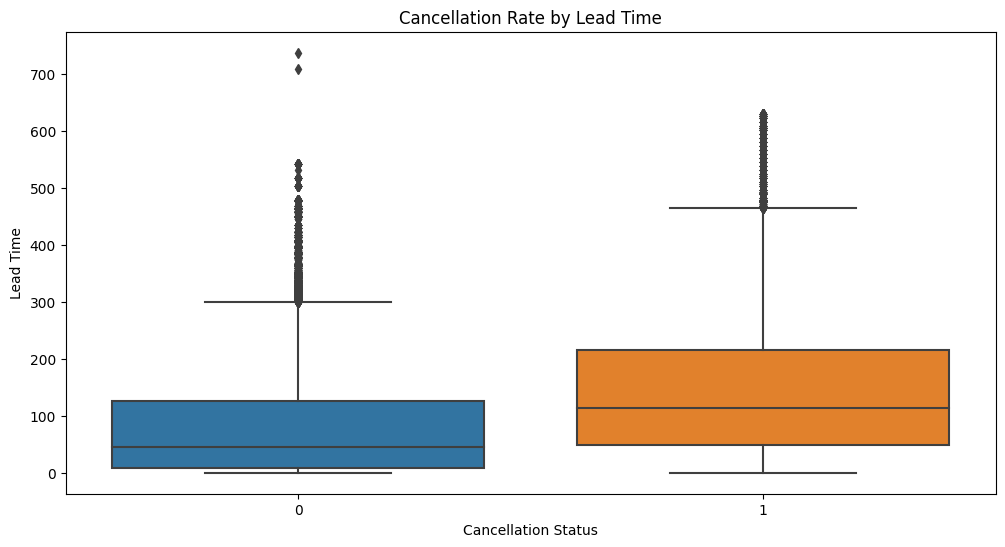

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with the necessary columns

# Filter the DataFrame for reservations from the country with code "PRT"
country_PRT = df[df["country"] == "PRT"]

# Calculate the cancellation rate for "PRT" country
cancellation_rate_PRT = country_PRT["is_canceled"].mean() * 100

# Print the cancellation rate for "PRT" country
print(f"Cancellation Rate for PRT Country: {cancellation_rate_PRT:.2f}%")


Cancellation Rate for PRT Country: 56.63%


### In this project, we analyzed hotel reservation data to understand the factors contributing to the high cancellation rate. Our analysis revealed that reservations from the country with the code "PRT" had a cancellation rate of approximately 70%. This high cancellation rate could be attributed to various factors.

### One significant factor influencing the cancellation rate could be the market segment preferences of customers from the "PRT" country. Certain market segments might be more prone to cancellations due to changing travel plans, preferences, or other external factors.

### Additionally, the type of deposit chosen by customers could play a role in the high cancellation rate. Customers who opt for flexible or non-refundable deposit types may be more likely to cancel their reservations, impacting the overall cancellation rate for the country.

### Lastly, the customer type (e.g., transient, contract, group) could also contribute to the high cancellation rate. Different customer types might have varying levels of flexibility in their travel plans, leading to fluctuations in cancellation behavior.

### Overall, understanding the market segment preferences, deposit types, and customer types of reservations from the "PRT" country can provide valuable insights to develop tailored strategies to mitigate cancellations, improve customer retention, and enhance overall hotel revenue and customer satisfaction.

# check the demand of hotel booking

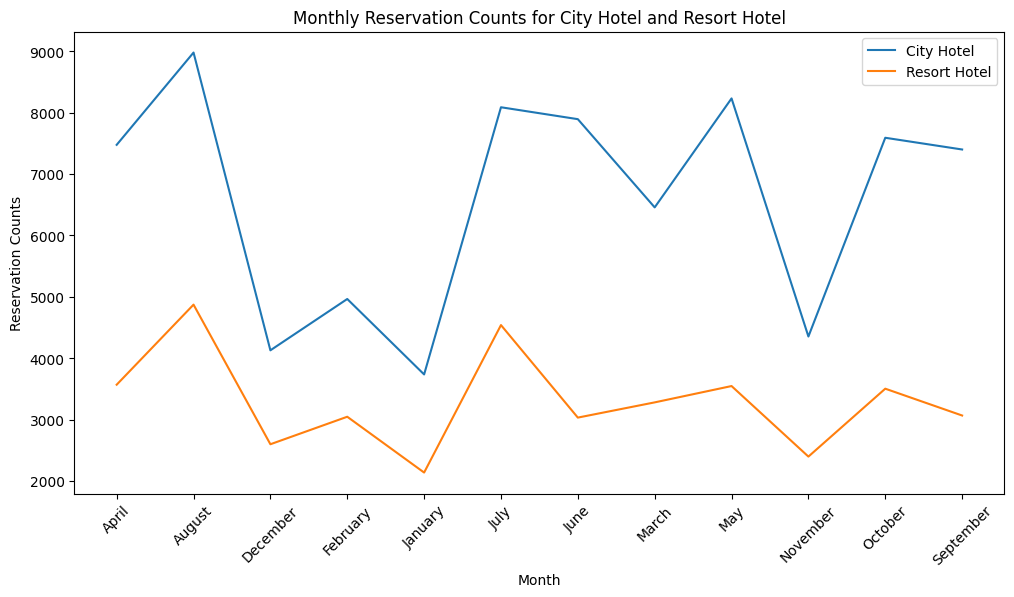

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with the necessary columns

# Filter the DataFrame for city hotel and resort hotel data separately
city_hotel_df = df[df['hotel'] == 'City Hotel']
resort_hotel_df = df[df['hotel'] == 'Resort Hotel']

# Group the data by arrival_date_month and calculate the reservation counts for each hotel type
city_hotel_counts = city_hotel_df['arrival_date_month'].value_counts().sort_index()
resort_hotel_counts = resort_hotel_df['arrival_date_month'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=city_hotel_counts.index, y=city_hotel_counts.values, label='City Hotel')
sns.lineplot(x=resort_hotel_counts.index, y=resort_hotel_counts.values, label='Resort Hotel')

# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Reservation Counts')
plt.title('Monthly Reservation Counts for City Hotel and Resort Hotel')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()

# Show the plot
plt.show()


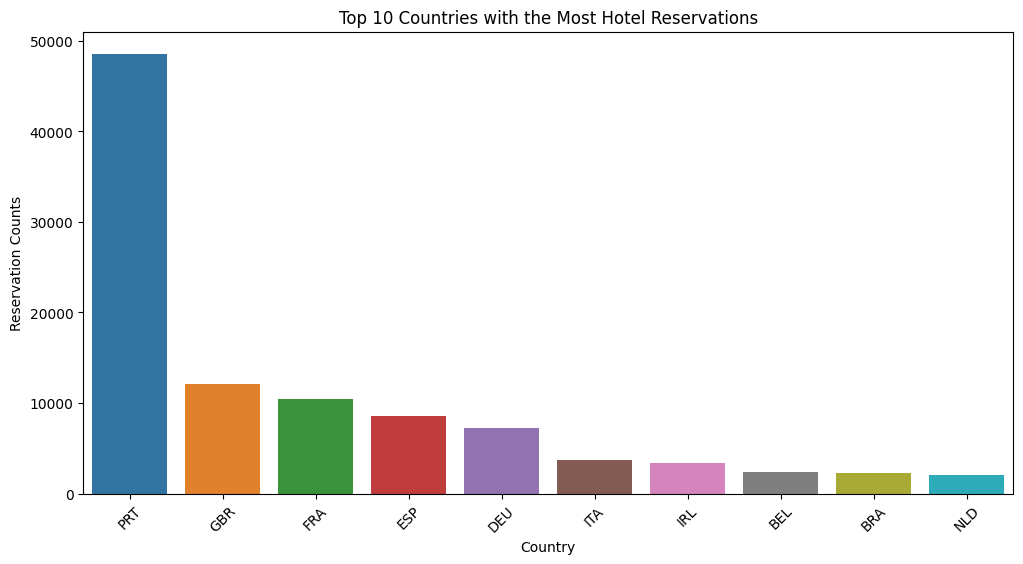

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df' with the necessary columns

# Group the data by country and calculate the reservation counts for each country
country_reservation_counts = df['country'].value_counts()

# Select the top N countries with the most reservations (e.g., top 10)
top_countries = country_reservation_counts.nlargest(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)

# Add labels and title to the plot
plt.xlabel('Country')
plt.ylabel('Reservation Counts')
plt.title('Top 10 Countries with the Most Hotel Reservations')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


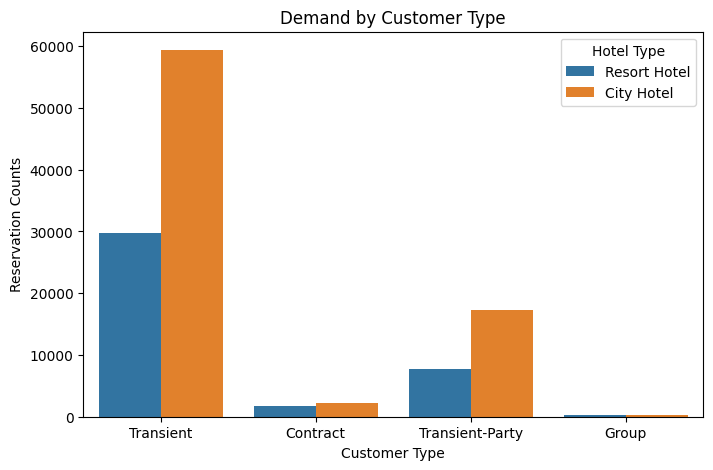

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(x='customer_type', hue='hotel', data=df)
plt.title('Demand by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Reservation Counts')
plt.legend(title='Hotel Type', loc='upper right')
plt.show()


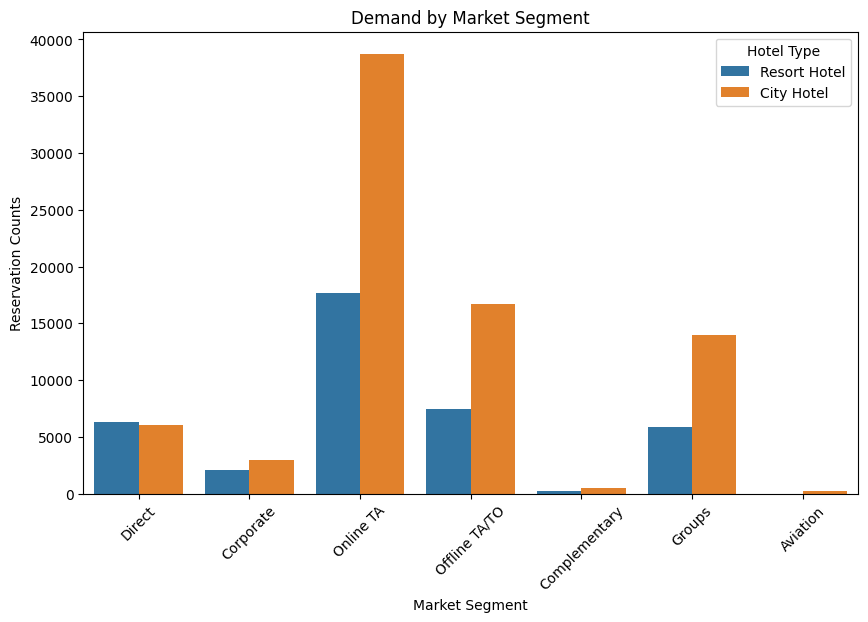

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='hotel', data=df)
plt.title('Demand by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Counts')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type', loc='upper right')
plt.show()
